# Lights model tutorial

In [1]:
%reset -f
%matplotlib inline
import numpy as np
from lights.simulation import SimuJointLongitudinalSurvival
from sklearn.model_selection import ShuffleSplit
from lifelines.utils import concordance_index as c_index_score
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
## Choose parameters ##
n_samples = 1000          # number of patients
n_features = 100          # number of features
n_active_features = 30    # number of active features
K = 1.                    # value of the active coefficients 
gap = .1                  # gap value to create high/low risk groups in time-independent features
rho = 0.5                 # coefficient of the toeplitz correlation matrix
r_c = 0.5                 # censoring rate
pi0 = 0.75                # proportion of desired low risk patients rate
verbose = True            # verbose mode to detail or not ongoing tasks

simu = SimuJointLongitudinalSurvival()
X, Y, delta = simu.simulate()

-----------------------------------------------------------
Launching simulation using CensoredGeomMixtureRegression...
Done simulating using CensoredGeomMixtureRegression in 3.57e-01 seconds.


## Data splitting

In [3]:
## Assign index for each feature ##
features_names = range(X.shape[1]) 
n_samples, n_features = X.shape

## Split data into training and test sets ##
test_size = .3  # proportion of data used for testing
rs = ShuffleSplit(n_splits=1, test_size=test_size, random_state=0)

for train_index, test_index in rs.split(X):
    X_test = X[test_index]
    delta_test = delta[test_index]
    Y_test = Y[test_index]

    X = X[train_index]
    Y = Y[train_index]
    delta = delta[train_index]  
    
print("%d%% for training, %d%% for testing." 
      % ((1 - test_size) * 100, test_size * 100))

70% for training, 30% for testing.


## Training 

In [4]:
## Choose parameters ##
tol = 1e-6            # tolerance for the convergence stopping criterion 
eta = 0.3             # parameter controlling the trade-off between l1 
                      # and l2 regularization in the elasticNet
gamma_chosen = '1se'  # way to select l_elasticNet_chosen: '1se' or 'min'
warm_start = True     # at each L-BGFS-B iteration, reset beta to 0 or take 
                      # the previous value 
grid_size = 30        # grid size for the cross validation procedure
metric = 'C-index'    # cross-validation metric: 'log_lik' or 'C-index'

# declare learner here        

## Cross-validation ##

## Run selected model with l_elasticNet_chosen ##

# run final fit here


Launching C-mix...

Testing l_elastic_net=6.33e-05 on fold  0 1 2 3 4: avg_score=7.80e-01
Testing l_elastic_net=8.70e-05 on fold  0 1 2 3 4: avg_score=7.91e-01
Testing l_elastic_net=1.20e-04 on fold  0 1 2 3 4: avg_score=8.04e-01
Testing l_elastic_net=1.64e-04 on fold  0 1 2 3 4: avg_score=7.94e-01
Testing l_elastic_net=2.26e-04 on fold  0 1 2 3 4: avg_score=7.84e-01
Testing l_elastic_net=3.10e-04 on fold  0 1 2 3 4: avg_score=8.09e-01
Testing l_elastic_net=4.26e-04 on fold  0 1 2 3 4: avg_score=7.86e-01
Testing l_elastic_net=5.85e-04 on fold  0 1 2 3 4: avg_score=8.01e-01
Testing l_elastic_net=8.03e-04 on fold  0 1 2 3 4: avg_score=8.14e-01
Testing l_elastic_net=1.10e-03 on fold  0 1 2 3 4: avg_score=8.11e-01
Testing l_elastic_net=1.52e-03 on fold  0 1 2 3 4: avg_score=8.04e-01
Testing l_elastic_net=2.08e-03 on fold  0 1 2 3 4: avg_score=8.07e-01
Testing l_elastic_net=2.86e-03 on fold  0 1 2 3 4: avg_score=8.19e-01
Testing l_elastic_net=3.93e-03 on fold  0 1 2 3 4: avg_score=8.15e-01

## Prediction

In [5]:
## Obtain the marker vector on test set ##

# prediction here

#c_index = c_index_score(Y_test, marker, delta_test)
#c_index = max(c_index, 1 - c_index)

print("Done predicting on test set.")
#print("C-index : %.2f" % c_index)

Done predicting on test set.
C-index : 0.85


## Figures

### Learning curves

/Users/Simon/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/Simon/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


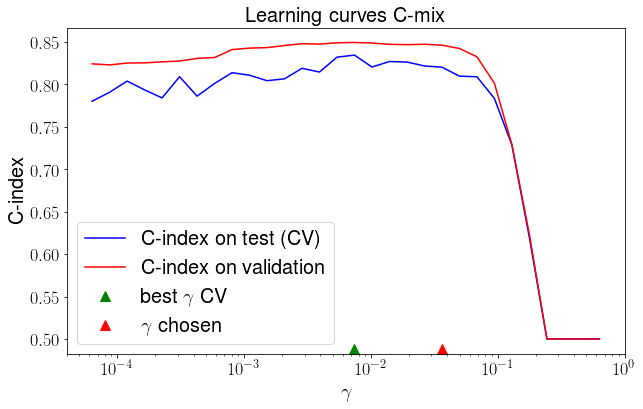

In [6]:
## Display learning curves ##


### Convergence

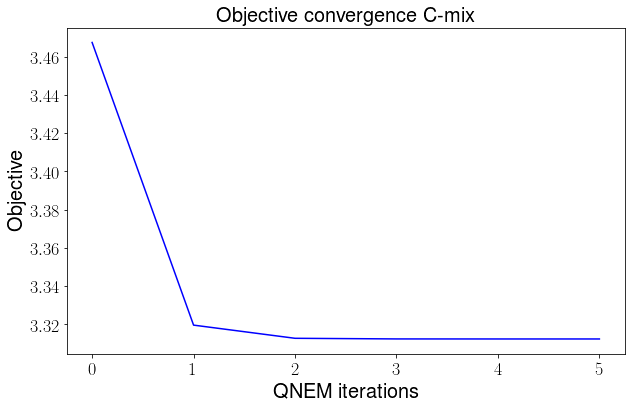

### Beta coefficients

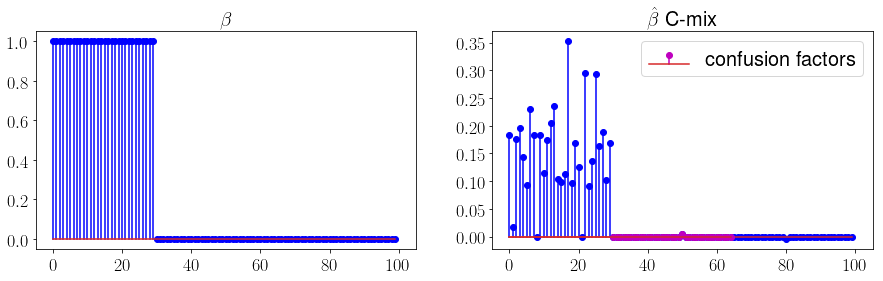